<a href="https://colab.research.google.com/github/AmelieSnn/resto_bangalore/blob/main/Kickstarteripynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KickStarter : Prédire le succès d’une campagne de financement participatif**

## Importation des librairies et du dataset

In [ ]:
### IMPORTATION DES LIBRAIRIES

# Basiques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

# Machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Modèle de classification que l'on va utiliser
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection


# Divers
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
import joblib


In [ ]:
# IMPORTATION DE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# I. COMPREHENSION DES DONNEES

In [ ]:
# IMPORTATION DU DATASET (ET SUPPRESSION DE LA COLONNE UNNAMED : 0)
df = pd.read_csv("/content/drive/MyDrive/Kickstarter Campaigns DataSet PARTAGE.csv", index_col = 'id')
df = df.drop("Unnamed: 0", axis = 1)

In [ ]:
# Affichage des premières informations de notre dataset
display(df.head())
df.info()
df.describe()
df.shape

,name,currency,launched_at,backers_count,blurb,country,deadline,slug,status,usd_pledged,sub_category,main_category,creator_id,blurb_length,goal_usd,city,duration
id,,,,,,,,,,,,,,,,,
1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,urban-farm-kits-our-solution-to-city-farming,failed,577.902078,food,Farms,41046209,122,785.82065,Victoria,60.0
1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,reflections-on-the-lhc-safety-report-review-an...,successful,211.000000,publishing,Academic,1877377173,35,93.00000,San Diego,24.0
1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,Ultra-customized bean to bar chocolate. Any fl...,US,2020-11-18 05:26:59,ultra-custom-chocolate-bars-0,successful,4697.000000,food,Small Batch,205122366,122,1500.00000,Philadelphia,30.0
1888984372,GlassWeb: Internet Monitoring,USD,2019-05-29 16:01:34,3,A module device to monitor internet connection...,US,2019-07-28 16:01:34,glassweb-internet-monitoring,failed,222.000000,technology,Gadgets,1458852038,69,25000.00000,Chicago,60.0
1409770586,Dreaming of Streaming - 96.9 FM KMRD-LP Madrid...,USD,2015-11-19 20:36:01,100,"Madrid's low power FM community radio station,...",US,2015-12-19 20:36:01,dreaming-of-streaming-969-fm-kmrd-lp-madrid-ne...,successful,5410.000000,publishing,Radio & Podcasts,1845213665,131,5000.00000,Madrid,30.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 217245 entries, 1714728788 to 1126079486
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   name           217245 non-null  object 
 1   currency       217245 non-null  object 
 2   launched_at    217245 non-null  object 
 3   backers_count  217245 non-null  int64  
 4   blurb          217245 non-null  object 
 5   country        217245 non-null  object 
 6   deadline       217245 non-null  object 
 7   slug           217245 non-null  object 
 8   status         217245 non-null  object 
 9   usd_pledged    217245 non-null  float64
 10  sub_category   217245 non-null  object 
 11  main_category  217245 non-null  object 
 12  creator_id     217245 non-null  int64  
 13  blurb_length   217245 non-null  int64  
 14  goal_usd       217245 non-null  float64
 15  city           217245 non-null  object 
 16  duration       217245 non-null  float64
dtypes: float64(3), i

(217245, 17)

#II. PREPROCESSING : NETTOYAGE DES DONNEES

In [ ]:
# NETTOYAGE DES DONNEES

# VALEURS MANQUANTES? ..................NON
df.isna().sum().sum()

# DOUBLONS? ............................OUI 19527
df.duplicated().sum()
# SUPPRESSION DES DOUBLONS
df.drop_duplicates(inplace = True)

In [ ]:
# SUPPRESSION DES COLONNES NON UTILES ET TRANSFORMATION DE CERTAINES DONNEES

#Suppression des colonnes non utiles
 # id : SUPPRESSION
 # currency : SUPPRESSION  (corrélée fortement avec le pays _ choix de garder le pays plutôt que la devis (plus parlant) )
 # blurb : SUPPRESSION
 # deadline : SUPPRESSION
 # city : SUPPRESSION (beaucoup trop de villes (13409) pour pouvoir en tirer des conclusions?) _ On ne garde que le pays
 # creator_id : SUPPRESSION
 # Status : SUPPRESSION de Live et Cancelled

data = df.drop(["name","currency", "blurb", "deadline", "city", "creator_id","main_category", "slug"], axis = 1)



In [ ]:
# Transformation de certaines colonnes : Extraction mois et année de "launched_at"
data['launched_at'] = pd.to_datetime(data['launched_at'])
data['launch_month'] = data['launched_at'].dt.month
data['launch_year'] = data['launched_at'].dt.year

# SUPPRESSION DE LAUNCHED_AT
data = data.drop(["launched_at"], axis = 1)


In [ ]:
# SUPPRESSION DES DURATION >60 jours, considérées comme outliers
data = data[data["duration"]<61]

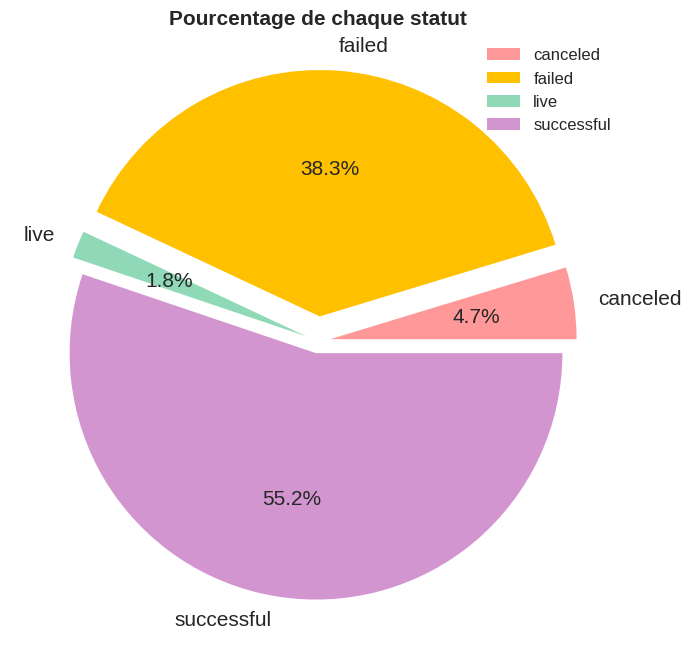

In [ ]:
#Graphique de répartition des modalités de la variable "statut"
ks_cnt_st= data.groupby('status')['status'].count()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,8))

colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
explode= [0.05,0.1,0.05,0.05]

plt.pie(ks_cnt_st.values,labels=ks_cnt_st.index.values,
        autopct='%.1f%%',
        explode=explode,
        colors=colors,
        textprops={'fontsize':15})
plt.title("Pourcentage de chaque statut",fontsize=15,fontweight='bold')
plt.legend(loc='upper right', fontsize=12)


plt.show()

In [ ]:
# SUPPRESSION DES LIVE et CANCELLED
data = data.drop(data[(data['status'] == 'live') | (data['status'] == 'canceled')].index)

In [ ]:
data.head()

,backers_count,country,status,usd_pledged,sub_category,blurb_length,goal_usd,duration,launch_month,launch_year
id,,,,,,,,,,
1714728788,16,CA,failed,577.902078,food,122,785.82065,60.0,2,2018
1639965256,7,US,successful,211.000000,publishing,35,93.00000,24.0,11,2014
1582062943,99,US,successful,4697.000000,food,122,1500.00000,30.0,10,2020
1888984372,3,US,failed,222.000000,technology,69,25000.00000,60.0,5,2019
1409770586,100,US,successful,5410.000000,publishing,131,5000.00000,30.0,11,2015


In [ ]:
# (184267, 10)
data.shape

(184267, 10)

# III.DATA-VISUALISATION

**MATRICE DE CORRELATION**

Corrélation très forte (0.79) entre les dons obtenus et le nombre de donnateurs


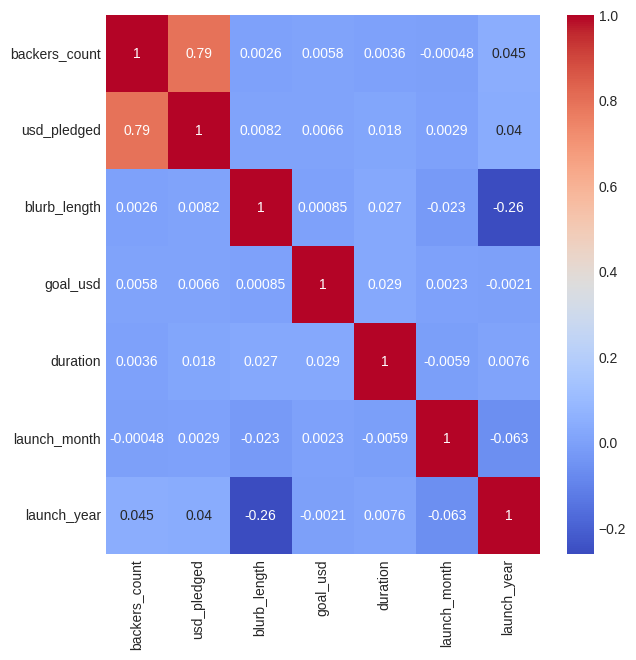

In [ ]:
# AFFICHAGE DE LA HEATMAP ( = ETUDE DE LA CORRELATION ENTRE TOUTES LES DONNEES NUMERIQUES DU DataFrame)
cor = data.corr()
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm');
print("Corrélation très forte (0.79) entre les dons obtenus et le nombre de donnateurs")

**ANALYSE DE LA REPARTITION GEOGRAPHIQUE**

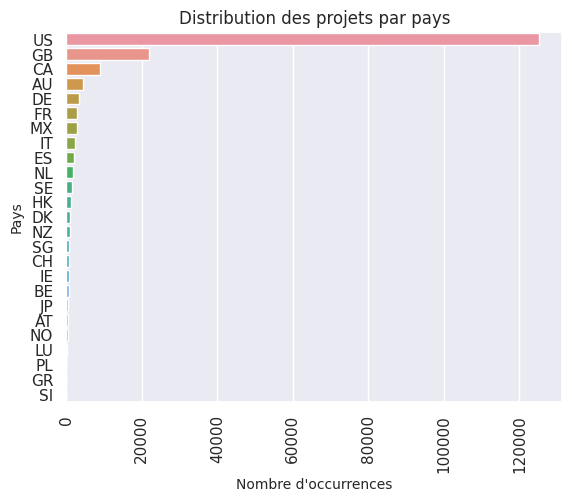

In [ ]:
# GRAPHE : Répartition des projets par pays

country_count = data['country'].value_counts()
sns.set(style="darkgrid")
sns.barplot(y=country_count.index,
            x=country_count.values);
plt.title("Distribution des projets par pays")
plt.ylabel('Pays', fontsize=10)
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel("Nombre d'occurrences", fontsize=10)
plt.show();

**ANALYSE DE LA DUREE**

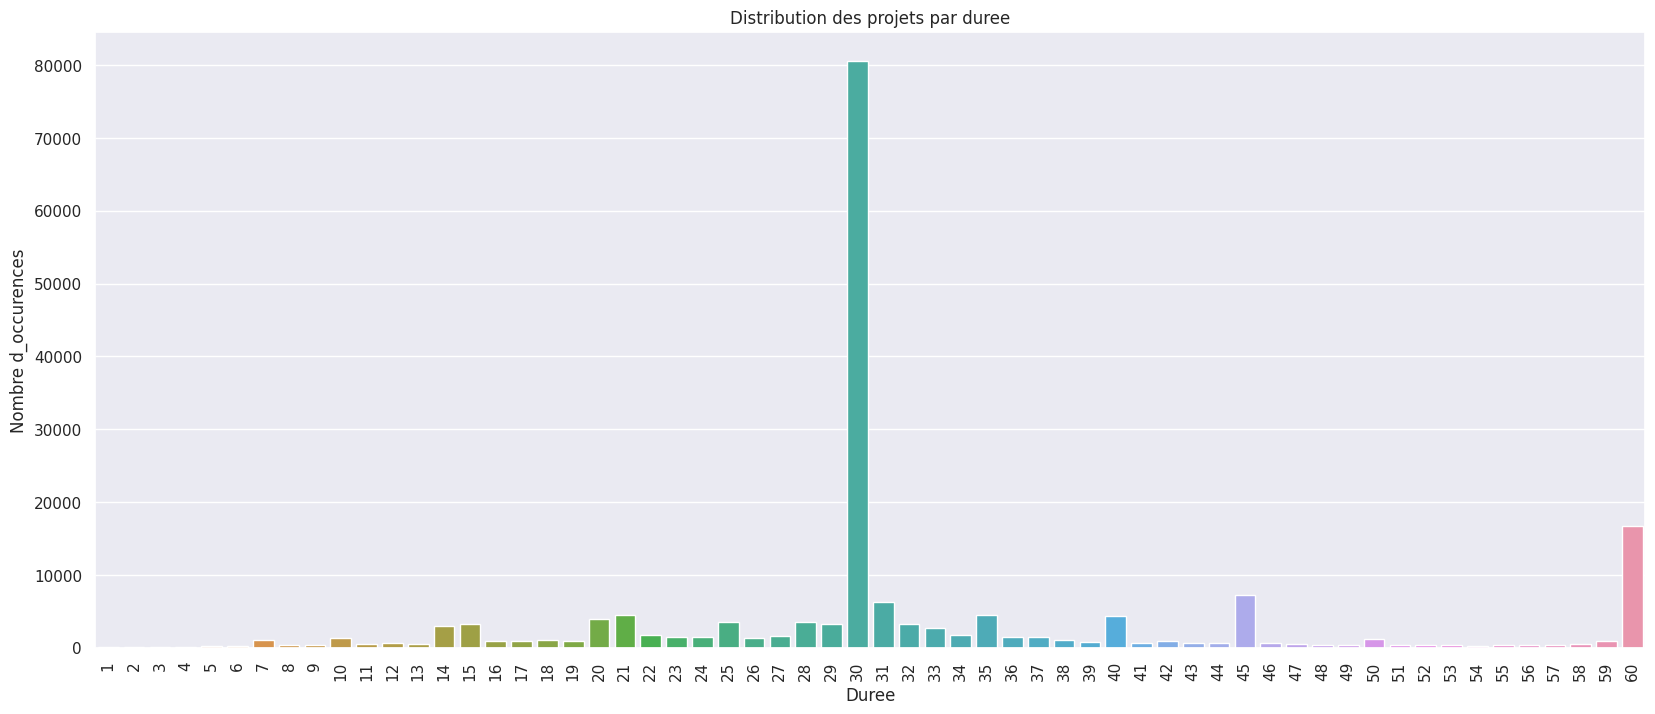

In [ ]:
# # GRAPHE : Nombre de projets par durée

duration_count = data['duration'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(20, 8))
sns.barplot(x=duration_count.index.astype(int),
            y=duration_count.values);
plt.title('Distribution des projets par duree')
plt.ylabel('Nombre d_occurences', fontsize=12)
#plt.xlim(0,61)
plt.xlabel('Duree', fontsize=(12))
plt.xticks(rotation=90, horizontalalignment="center")

plt.show();

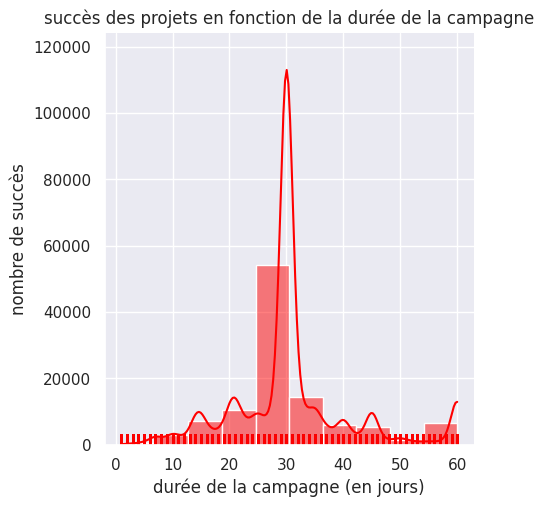

In [ ]:
# GRAPHE : Duration / succes (durée optimale pour garantir le succès)
sns.displot(data[data['status']=='successful']['duration'], bins=10, kde=True, rug=True, color='red');
plt.ylabel('nombre de succès');
plt.xlabel('durée de la campagne (en jours)');
plt.title('succès des projets en fonction de la durée de la campagne');

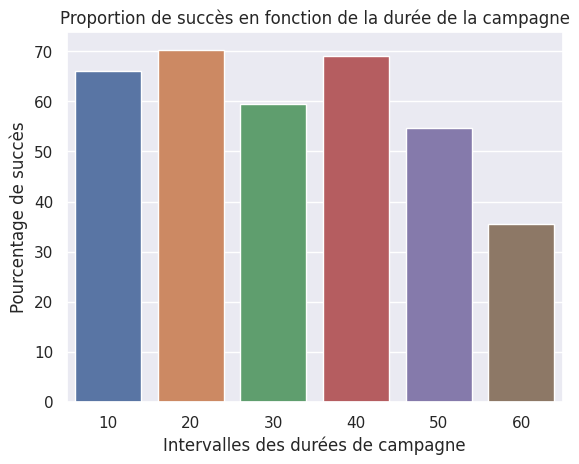

In [ ]:
#Graph % succes /duration
import numpy as np
def to_bins(x):
    arr = np.arange(0,70,10)
    for i in arr:#while sur la longueur de l'array
        if x > i: continue
        else: return i
data['bins'] = data['duration'].apply(to_bins)

count_duration_total = data.groupby(['bins']).count()#total
count_duration_success = data[data['status'] == 'successful'].groupby(['bins']).count()#success
nouveau_dataframe = pd.DataFrame(count_duration_success/count_duration_total*100)
nouveau_dataframe.head(10)
sns.barplot(x= nouveau_dataframe.index, y = 'duration', data = nouveau_dataframe);
plt.xlabel('Intervalles des durées de campagne');
plt.ylabel('Pourcentage de succès');
plt.title('Proportion de succès en fonction de la durée de la campagne');

In [ ]:
# SUPPRESSION BINS
data = data.drop("bins", axis = 1)

**ANALYSE DE LA LONGUEUR DU TEXTE DESCRIPTIF**

In [ ]:
# GRAPHE : blurb_length / succes (longueur optimale pour garantir le succès)
#sns.displot(data[data['status']=='successful']['blurb_length'], bins=10, kde=True, rug=True, color='red');
#plt.ylabel('nombre de succès');
#plt.xlabel('longueur du texte (en nombre de caracteres)');
#plt.title('nombre de succès en fonction de la longueur du texte');

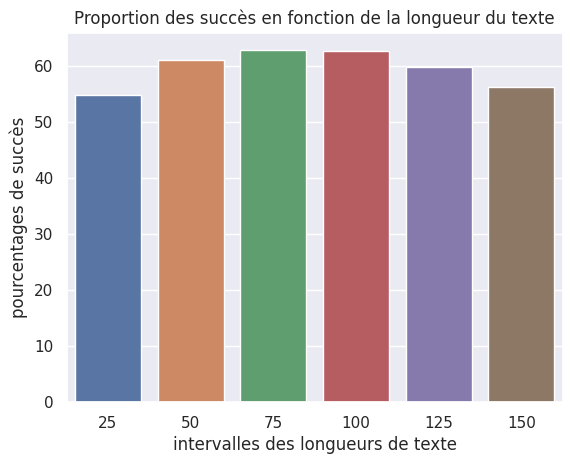

In [ ]:
# Proportion du succes en fonction de la longueur du texte
def to_bins(x):
    arr = np.arange(0,175,25)
    for i in arr:#while sur la longueur de l'array
        if x > i: continue
        else: return i
#Changer les indices de l'axe des x sur le graphique a posteriori
#il existe une fonction du type round à la dizaine inférieure
data['bins2'] = data['blurb_length'].apply(to_bins)

count_blurb_total = data.groupby(['bins2']).count()#total
count_blurb_success = data[data['status'] == 'successful'].groupby(['bins2']).count()#success
#join les deux dataframes
#nouveau_dataframe['proportion'] = nouveau_dataframe['success']/nouveau_dataframe['total']*100
nouveau_dataframe2 = pd.DataFrame(count_blurb_success/count_blurb_total*100)
nouveau_dataframe2.head(10)
sns.barplot(x= nouveau_dataframe2.index, y = 'duration', data = nouveau_dataframe2);
plt.ylabel('pourcentages de succès');
plt.xlabel('intervalles des longueurs de texte');
plt.title('Proportion des succès en fonction de la longueur du texte');
#nouveau_dataframe['proportion'] = count_duration_success/count_duration_total*100
#histplot/displot x et y dans le dataframe
#proportion y / index de nouveau dataframe = x

In [ ]:
# Suppression des bins
data = data.drop("bins2", axis = 1)

**ANALYSE DES CATEGORIES**

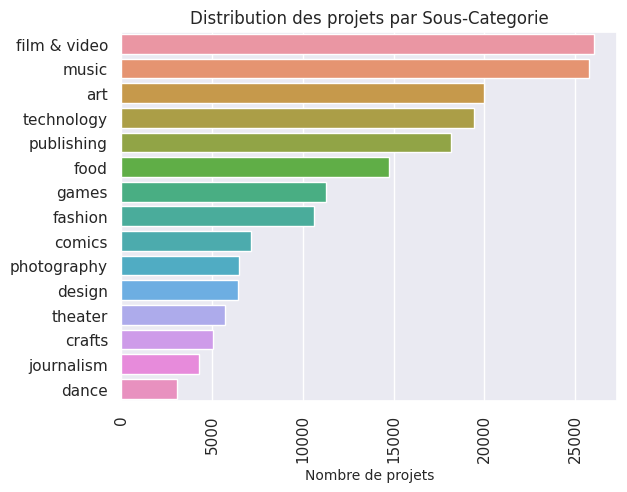

Les sous-catégories film&video et musique sont majoritaires, suivies de prêt par l'art et technologie


In [ ]:
 # Distribution des projets par SOUS CATEGORIE
sub_category_count = data['sub_category'].value_counts()
sns.set(style="darkgrid")
sns.barplot(y=sub_category_count.index,
            x=sub_category_count.values);
plt.title('Distribution des projets par Sous-Categorie')
plt.xlabel('Nombre de projets', fontsize=10)
plt.xticks(rotation=90, horizontalalignment="center")
plt.show();
print("Les sous-catégories film&video et musique sont majoritaires, suivies de prêt par l'art et technologie")

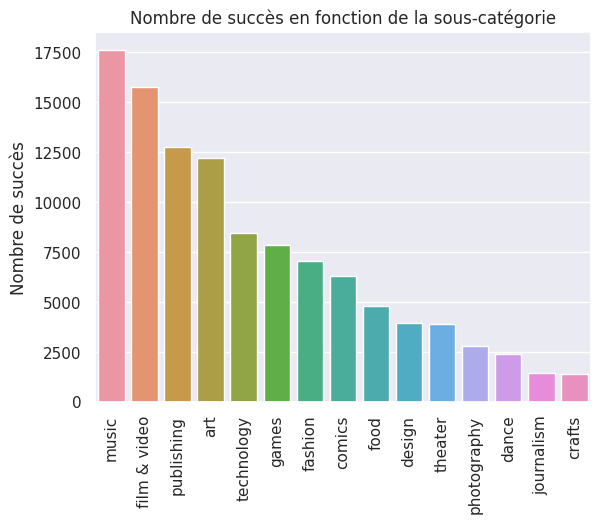

In [ ]:
# GRAPHE : Nombre de succès en fonction de la sous-catégorie

subcat_success = data[data['status'] == 'successful']['sub_category'].value_counts(sort=True)
sns.barplot(x=subcat_success.index, y=subcat_success)
plt.ylabel('Nombre de succès')
plt.title('Nombre de succès en fonction de la sous-catégorie')
plt.xticks(rotation=90)
plt.show()

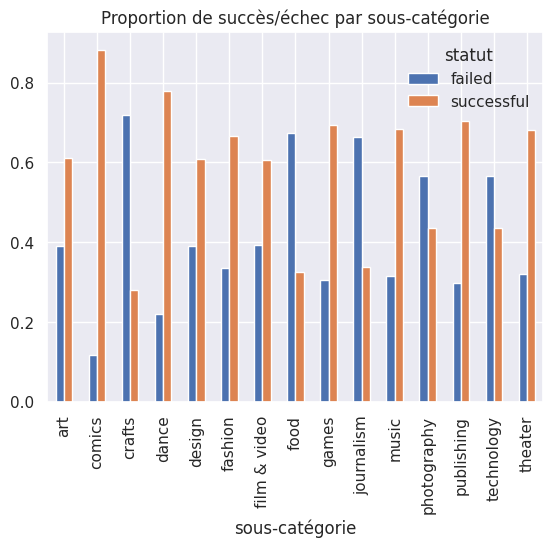

In [ ]:
# Proportion de succès/échec par sous-catégorie

pd.crosstab(data['sub_category'], data['status'], rownames=['sous-catégorie'], colnames=['statut'], normalize='index')
from matplotlib.pyplot import figure
barplot = pd.crosstab(data['sub_category'], data['status'], rownames=['sous-catégorie'], colnames=['statut'], normalize='index').plot.bar(rot=90)
plt.title("Proportion de succès/échec par sous-catégorie");

**ANALYSE DES PERIODES**

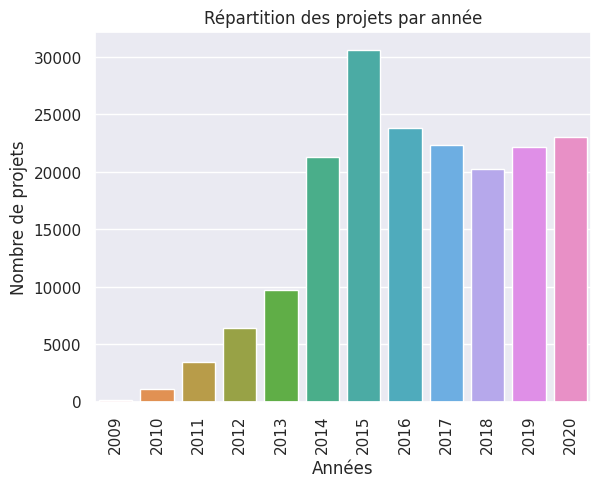

In [ ]:
#GRAPHE : Repartition des projets par année

sns.barplot(x=data['launch_year'].value_counts().index.astype(int), y=data['launch_year'].value_counts())
plt.xlabel('Années')
plt.ylabel('Nombre de projets')
plt.title('Répartition des projets par année')
plt.xticks(rotation=90, horizontalalignment="center")
plt.show();

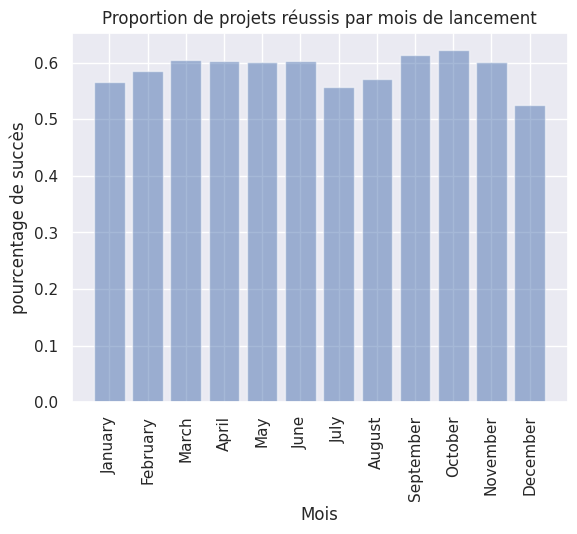

In [ ]:
#Graphe : Proportion de projets réussis par mois de lancement

mois_values = data['launch_month'].unique()
mois_approved = {}

for m in mois_values.astype(int) :
    mois_name = calendar.month_name[m]  # Obtenir le nom du mois correspondant
    mois_approved[mois_name] = data.loc[(data['launch_month'] == m) & (data['status'] == 'successful')].shape[0] / data.loc[data['launch_month'] == m].shape[0]

sorted_months = sorted(mois_approved.keys(), key=lambda x: list(calendar.month_name).index(x))  # Trier les mois par ordre chronologique

sorted_values = [mois_approved[m] for m in sorted_months]

plt.figure()
plt.bar(sorted_months, sorted_values, alpha=0.5)
plt.xlabel('Mois', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel("pourcentage de succès", fontsize=12)
plt.title('Proportion de projets réussis par mois de lancement')
plt.show()

<Axes: xlabel='launch_month', ylabel='count'>

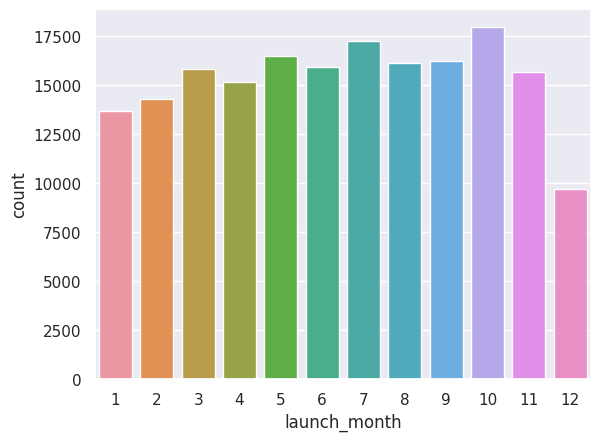

In [ ]:
#Nombre de projets par mois de lancement
sns.countplot(x=data['launch_month'])

<Axes: xlabel='launch_month', ylabel='count'>

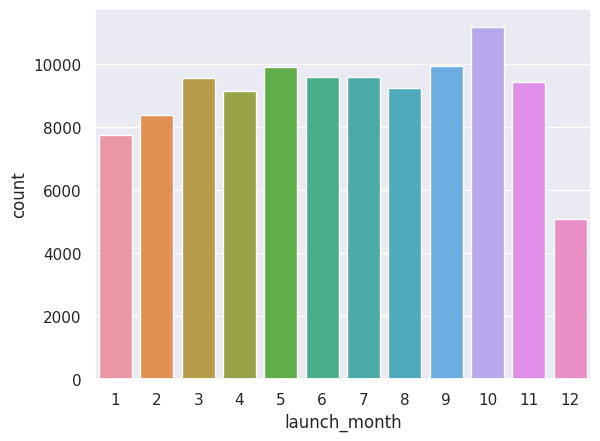

In [ ]:
#Nombre de projets REUSSIS par mois de lancement
display(sns.countplot(x=data[data['status']=='successful']['launch_month']))

**ANALYSE DES SUCCES DE FINANCEMENTS EN FONCTION DE L'OBJECTIF DE LA CAGNOTTE**

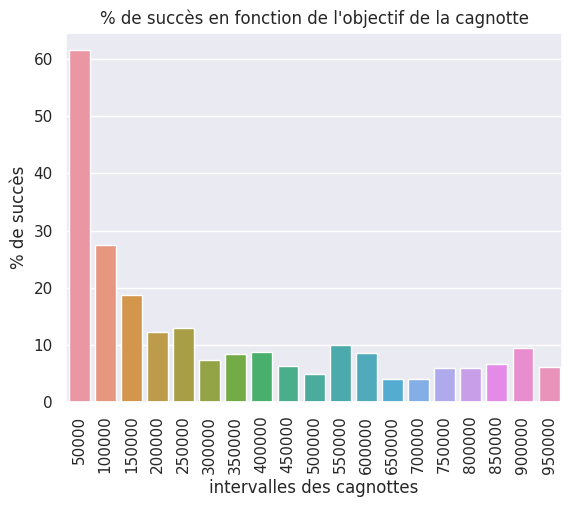

In [ ]:
 # GRAPHE : goal usd / success
import numpy as np
def to_bins(x):
    arr = np.arange(0,1000000,50000)
    for i in arr:
        if x > i: continue
        else: return i
data['bins3'] = data['goal_usd'].apply(to_bins)

count_blurb_total = data.groupby(['bins3']).count()#total
count_blurb_success = data[data['status'] == 'successful'].groupby(['bins3']).count()#success
nouveau_dataframe2 = pd.DataFrame(count_blurb_success/count_blurb_total*100)
nouveau_dataframe2.head(10)
sns.barplot(x= nouveau_dataframe2.index.astype(int), y = 'goal_usd', data = nouveau_dataframe2);
plt.ylabel('% de succès');
plt.xlabel('intervalles des cagnottes');
plt.xticks(rotation=90)
plt.title("% de succès en fonction de l'objectif de la cagnotte");

In [ ]:
data.columns

Index(['backers_count', 'country', 'status', 'usd_pledged', 'sub_category',
       'blurb_length', 'goal_usd', 'duration', 'launch_month', 'launch_year',
       'bins3'],
      dtype='object')

In [ ]:
data = data.drop("bins3", axis = 1)

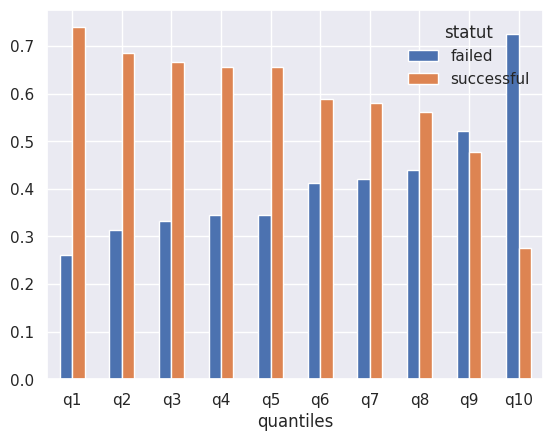

In [ ]:
# Proportion de succès/echecs parmi les goals_usd séparés en quantiles
data['quantile_goal_usd'] = pd.qcut(data['goal_usd'], 10, labels=['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10'])
cross_tab = pd.crosstab(data['quantile_goal_usd'], data['status'], rownames=['quantiles'], colnames=['statut'], normalize='index')
barplot = cross_tab.plot.bar(rot=0)

In [ ]:
data.columns


Index(['backers_count', 'country', 'status', 'usd_pledged', 'sub_category',
       'blurb_length', 'goal_usd', 'duration', 'launch_month', 'launch_year',
       'quantile_goal_usd'],
      dtype='object')

## **ANALYSE EN COMPOSANTES PRINCIPALE**

Les valeurs propres sont : [1.03997144 0.99915545 0.96088939]


IndexError: ignored

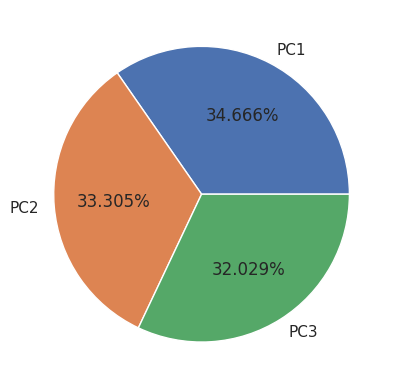

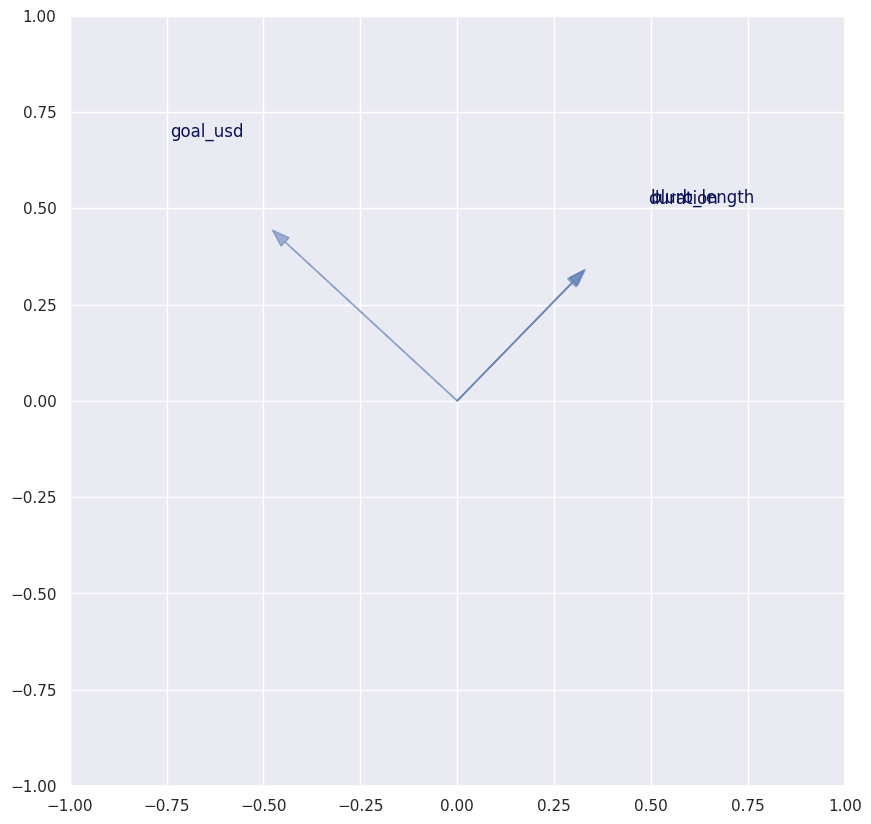

In [ ]:
#ACP : recherche des composantes principales
target = data['status']
df1=data.drop(['status', 'sub_category','backers_count', 'usd_pledged', 'launch_year','launch_month','country','quantile_goal_usd'], axis =1)

#le = LabelEncoder()
#df1['sub_category'] = le.fit_transform(df1['sub_category'])

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Z = sc.fit_transform(df1)


from sklearn.decomposition import PCA
pca = PCA()

Coord = pca.fit_transform(Z)

print('Les valeurs propres sont :', pca.explained_variance_)


# Camembert de la répartion de la part de variance expliquée par chaque axe.
L1 = list(pca.explained_variance_ratio_[0:5])

plt.pie(L1, labels=['PC1', 'PC2', 'PC3'],
        autopct='%1.3f%%');

#Graphique
racine_valeurs_propres = np.sqrt(pca.explained_variance_)
corvar = np.zeros((3, 3))
for k in range(3):
    corvar[:, k] = pca.components_[:, k] * racine_valeurs_propres[k]

# Délimitation de la figure
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Affichage des variables
#for j in range(4):
   #plt.annotate(df1.columns[j], (corvar[j, 0], corvar[j, 1]), color='#091158')
    #plt.arrow(0, 0, corvar[j, 0]*0.6, corvar[j, 1]*0.6, alpha=0.5, head_width=0.03, color='b')
for j in range(4):
    plt.annotate(df1.columns[j], (corvar[j, 0], corvar[j, 1]), color='#091158')
    plt.arrow(0, 0, corvar[j, 0]*0.6, corvar[j, 1]*0.6, alpha=0.5, head_width=0.03, color='b')


# Ajout des axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

# Cercle et légendes
cercle = plt.Circle((0, 0), 1, color='#16E4CA', fill=False)
axes.add_artist(cercle)
plt.xlabel('AXE 1')
plt.ylabel('AXE 2');


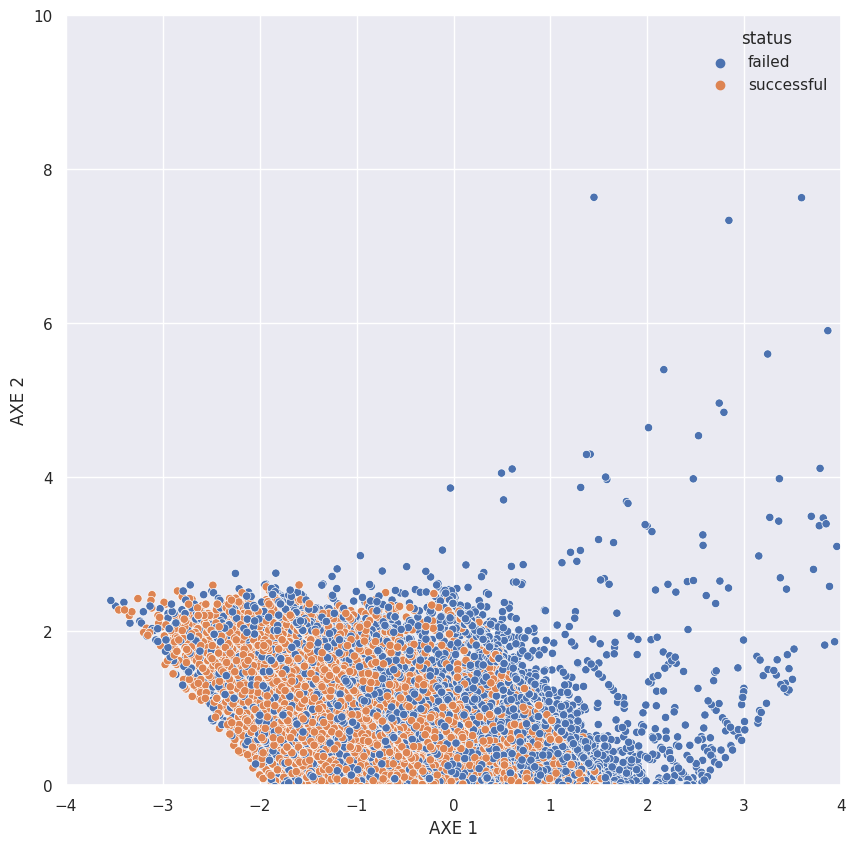

In [ ]:
PCA_mat = pd.DataFrame({'AXE 1': Coord[:, 0], 'AXE 2': Coord[:, 1], 'target': target})
plt.figure(figsize=(10, 10))
plt.xlim([-4,4])
plt.ylim([0,10])
sns.scatterplot(x='AXE 1', y='AXE 2', hue=target, data=PCA_mat);


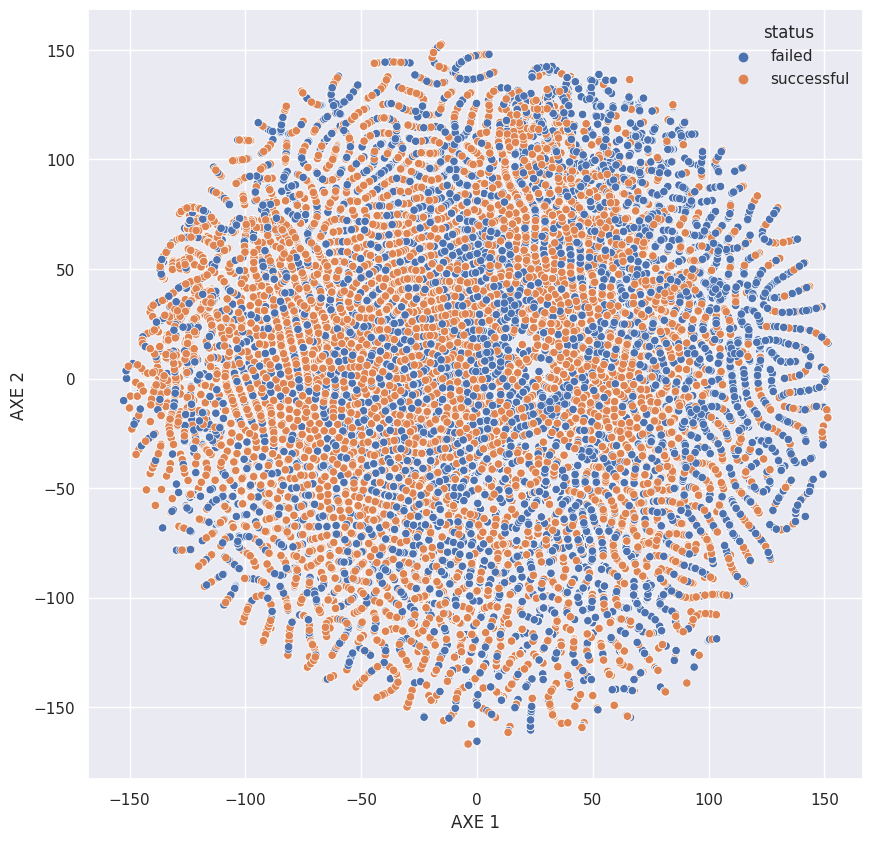

In [ ]:
#TSNE (run : 1H16)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
Coord_TSNE = tsne.fit_transform(Z)
tsne_df = pd.DataFrame({'AXE 1': Coord_TSNE[:, 0], 'AXE 2': Coord_TSNE[:, 1], 'Target': target})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='AXE 1', y='AXE 2', hue=target, data=tsne_df);



In [ ]:
#TSNE +ACP (run : 1H10)
tsne_new = TSNE(n_components =2, random_state =0)
Coord_TSNE_ACP = tsne_new.fit_transform(Coord)

tsne_acp_df = pd.DataFrame({'AXE 1': Coord_TSNE_ACP [:,0], 'AXE 2': Coord_TSNE_ACP [:,1], 'Target': target})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='AXE 1', y='AXE 2', hue= target, data=tsne_acp_df);

In [ ]:
#conclusion
# l' ACP et le TSNE n'ont pas d'influence sur le status Failed ou successful


# 3) MACHINE LEARNING

In [ ]:
data.head()
data.shape

(184267, 11)

In [ ]:
# (184267, 6)
# Suppression de launch_year, backerscounts et usd_pledged, qui sont des variables à posteriori, et "quantile usd" utilisé précédemment
data_ml = data.drop(["backers_count","usd_pledged", "launch_year","country","quantile_goal_usd"], axis = 1)
data_ml.shape


(184267, 6)

In [ ]:
data_ml.head()

,status,sub_category,blurb_length,goal_usd,duration,launch_month
id,,,,,,
1714728788,failed,food,122,785.82065,60.0,2
1639965256,successful,publishing,35,93.00000,24.0,11
1582062943,successful,food,122,1500.00000,30.0,10
1888984372,failed,technology,69,25000.00000,60.0,5
1409770586,successful,publishing,131,5000.00000,30.0,11


In [ ]:
#dychotomisation de sub-category
data_ml_subcat = pd.get_dummies(data_ml['sub_category'], prefix = 'sub_category')

In [ ]:
#dychotomisation de launch_month
data_ml_launch_month = pd.get_dummies(data_ml['launch_month'], prefix = 'launch_month')

In [ ]:
# CREATION DU df_ml UTILISE POUR LE MACHINE LEARNING
df_ml = pd.concat([data_ml,data_ml_subcat, data_ml_launch_month], axis =1)
display(df_ml.head())
df_ml.shape

,status,sub_category,blurb_length,goal_usd,duration,launch_month,sub_category_art,sub_category_comics,sub_category_crafts,sub_category_dance,...,launch_month_3,launch_month_4,launch_month_5,launch_month_6,launch_month_7,launch_month_8,launch_month_9,launch_month_10,launch_month_11,launch_month_12
id,,,,,,,,,,,,,,,,,,,,,
1714728788,failed,food,122,785.82065,60.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1639965256,successful,publishing,35,93.00000,24.0,11,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1582062943,successful,food,122,1500.00000,30.0,10,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1888984372,failed,technology,69,25000.00000,60.0,5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1409770586,successful,publishing,131,5000.00000,30.0,11,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


(184267, 33)

In [ ]:
#séparation du jeu de données en variables explicatives et variable cible
df_ml_feats = df_ml.drop(["status","sub_category", "launch_month"], axis = 1)
df_ml_target = data_ml['status']


In [ ]:
df_ml_feats.head()

,blurb_length,goal_usd,duration,sub_category_art,sub_category_comics,sub_category_crafts,sub_category_dance,sub_category_design,sub_category_fashion,sub_category_film & video,...,launch_month_3,launch_month_4,launch_month_5,launch_month_6,launch_month_7,launch_month_8,launch_month_9,launch_month_10,launch_month_11,launch_month_12
id,,,,,,,,,,,,,,,,,,,,,
1714728788,122,785.82065,60.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1639965256,35,93.00000,24.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1582062943,122,1500.00000,30.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1888984372,69,25000.00000,60.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1409770586,131,5000.00000,30.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#création jeu de test avec 20% de donnees test et random_state = 42
X_train, X_test, y_train, y_test = train_test_split(df_ml_feats, df_ml_target, test_size = 0.2, random_state = 42)

# encodage de la cible
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [ ]:
X_test.describe()

,blurb_length,goal_usd,duration,sub_category_art,sub_category_comics,sub_category_crafts,sub_category_dance,sub_category_design,sub_category_fashion,sub_category_film & video,...,launch_month_3,launch_month_4,launch_month_5,launch_month_6,launch_month_7,launch_month_8,launch_month_9,launch_month_10,launch_month_11,launch_month_12
count,36854.000000,3.685400e+04,36854.000000,36854.000000,36854.000000,36854.000000,36854.00000,36854.000000,36854.000000,36854.000000,...,36854.000000,36854.000000,36854.000000,36854.000000,36854.000000,36854.000000,36854.000000,36854.000000,36854.000000,36854.000000
mean,108.467575,4.571034e+04,32.807809,0.105253,0.037445,0.027405,0.01723,0.036305,0.057606,0.141423,...,0.086748,0.084604,0.088430,0.088946,0.092527,0.086693,0.086938,0.098361,0.086585,0.051202
std,29.509553,1.403546e+06,11.901847,0.306884,0.189852,0.163264,0.13013,0.187052,0.232999,0.348462,...,0.281469,0.278295,0.283923,0.284669,0.289773,0.281389,0.281747,0.297806,0.281230,0.220413
min,1.000000,1.000000e-02,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,1.500000e+03,30.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,121.000000,4.922396e+03,30.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,131.000000,1.250000e+04,35.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,150.000000,1.216478e+08,60.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **MODELE 1 : REGRESSION LOGISTIQUE**

In [ ]:
# Instancier le modele de LogisticRegression
lr = LogisticRegression(C =1.0, max_iter = 100, random_state = 42)

# Standardisation des données : mise à l'echelle des colonnes de X_train et X_test
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Entraînement de l'algorithme sur l'ensemble d'entraînement (X_train et y_train)
lr.fit(X_train_scaled, y_train)

# Prédire les données de l'ensemble de test et stocker les dans la variable y_pred.
y_pred = lr.predict(X_test_scaled)

# Afficher la matrice de confusion cm pour verifier le ML
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
# Calculer le taux de bonnes prédictions du modèle.
print('score clf:', lr.score(X_test_scaled, y_test))

In [ ]:
# Rapport 1 de classification des predictions de LA REGRESSION LOGISTIQUE
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# Gridsearch pour déterminer le meilleur paramètre à utiliser
parametres = {'C':[0.1,1,10,100,1000], 'solver': ['lbfgs']}
grid_lr = GridSearchCV(estimator=lr, param_grid=parametres)
#grille = grid_lr.fit(X_train_scaled,y_train)
print("les meilleurs paramètres sont : ", grid_lr.best_params_)


In [ ]:
# JOBLIB GRID SEARCH GRID_LR
import joblib
# Sauvegarder les résultats de GridSearch avec joblib
joblib.dump(grid_lr, 'grid_lr.joblib')

In [ ]:
from google.colab import files

# Télécharger le modèle sauvegardé
files.download('grid_lr.joblib')

In [ ]:
# Rapport 2 de classification des predictions de LA REGRESSION LOGISTIQUE en utilisant le bestparam trouvé avec GridSearch

# mise à l'echelle des colonnes de X_train et X_test
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instancier le modele de LogisticRegression
lr2 = LogisticRegression(C =100, max_iter = 100, random_state = 42)

# Entraîner l'algorithme sur l'ensemble d'entraînement (X_train et y_train)
lr2 = lr2.fit(X_train_scaled, y_train)

# Prédire les données de l'ensemble de test et stocker les dans la variable y_pred.
y_pred_lr = lr2.predict(X_test_scaled)

# Afficher la matrice de confusion cm pour verifier le ML
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test, y_pred))

In [ ]:
# JOBLIB
joblib.dump(lr2, 'lr.joblib')
files.download('lr.joblib')

In [ ]:
# JOBLIB
joblib.dump(y_pred_lr, 'y_pred_lr.joblib')
files.download('y_pred_lr.joblib')

In [ ]:
print('score lr2:', lr2.score(X_test_scaled, y_test))

In [ ]:
# Score avec le boosting de adaboost
from sklearn.ensemble import AdaBoostClassifier

# Création du classifier et construction du modèle sur les données d'entraînement
ac = AdaBoostClassifier(base_estimator= lr2, n_estimators=400)
ac.fit(X_train_scaled, y_train)

# Calcul de l'accuracy
ac.score(X_test_scaled, y_test)


# **MODELE 2 : ARBRE DE DECISION**

In [ ]:
# Standardisation des données : mise à l'echelle des colonnes de X_train et X_test
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Définir les meilleurs hyperparamètres avec GridSearch
dtc = DecisionTreeClassifier()
parametres = {'criterion':['gini', 'entropy'], 'max_depth': [2,3,6,8], 'max_leaf_nodes' : [2,3,6,8,10]}
grid_dtc = GridSearchCV(estimator=dtc, param_grid=parametres)
#grid_dtc.fit(X_train_scaled,y_train)
print("les meilleurs paramètres sont : ", grid_dtc.best_params_)

In [ ]:
# JOBLIB GRID SEARCH GRID_DTC
import joblib
# Sauvegarder les résultats de GridSearch avec joblib
joblib.dump(grid_dtc, 'grid_dtc.joblib')

In [ ]:
from google.colab import files

# Télécharger le modèle sauvegardé
files.download('grid_dtc.joblib')

In [ ]:
#instancier le modele de Decision Tree Classifier avec les meilleurs hyperparamètres
dtc = DecisionTreeClassifier(criterion ='gini', max_depth=8, max_leaf_nodes=10, random_state=123)

# Entraîner l'algorithme sur l'ensemble d'entraînement (X_train et y_train)
dtc.fit(X_train_scaled, y_train)

# Prédire les données de l'ensemble de test et stocker les dans la variable y_pred.
y_pred = dtc.predict(X_test_scaled)

# Afficher la matrice de confusion cm pour verifier le ML
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Matrice de confusion:')
print(cm)
print('score arbre:', dtc.score(X_test_scaled, y_test))

Matrice de confusion:
[[ 7506  7564]
 [ 4784 17000]]
score arbre: 0.6649481738752917


In [ ]:
# JOBLIB
import joblib
# Sauvegarder les résultats de GridSearch avec joblib
joblib.dump(dtc, 'dtc.joblib')

In [ ]:
from google.colab import files

# Télécharger le modèle sauvegardé
files.download('dtc.joblib')

In [ ]:
# Calculer le taux de bonnes prédictions du modèle.
print('score dtc:', dtc.score(X_test_scaled, y_test))

In [ ]:
# Determination des features importances - résultat de la variante
%matplotlib inline
feats = {}
for feature, importance in zip(df_ml_feats.columns, dtc.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False).head(10)

In [ ]:
#Il apparaît que goal_usd, duration, crafts, food ont une importance significative pour le DecisionTreeClassifier

In [ ]:
#Nouveaux score et matrice de confusion en ne gardant que ces deux variables : les prédictions ne perdent pas en qualité
df_ml_feats2 = df_ml_feats[['duration', 'goal_usd', 'sub_category_crafts', 'sub_category_food']]

#création jeu de test avec 20% de donnees test et random_state = 42
X_train, X_test, y_train, y_test = train_test_split(df_ml_feats2, df_ml_target, test_size = 0.2, random_state = 42)

#encodage de la cible
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

#instancier le modele de Decision Tree Classifier avec les meilleurs paramètres
dtc = DecisionTreeClassifier(criterion ='gini', max_depth=8, max_leaf_nodes=10, random_state=123)

# Standardisation des données : mise à l'echelle des colonnes de X_train et X_test
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner l'algorithme sur l'ensemble d'entraînement (X_train et y_train)
dtc.fit(X_train_scaled, y_train)

# Prédire les données de l'ensemble de test et stocker les dans la variable y_pred.
y_pred_dtc = dtc.predict(X_test_scaled)

# Afficher la matrice de confusion cm et le score pour verifier le ML
print('Score =',dtc.score(X_test_scaled,y_test),'\n')
print('matrice de confusion :')
cm = confusion_matrix(y_test,y_pred_dtc)
print(cm)

# Affichage du rapport de classification
print('\nRapport de classification :')
print(classification_report(y_test, y_pred_dtc))



Score = 0.6649481738752917 

matrice de confusion :
[[ 7506  7564]
 [ 4784 17000]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.61      0.50      0.55     15070
           1       0.69      0.78      0.73     21784

    accuracy                           0.66     36854
   macro avg       0.65      0.64      0.64     36854
weighted avg       0.66      0.66      0.66     36854



In [ ]:
# JOBLIB

joblib.dump(dtc, 'dtc2.joblib')
files.download('dtc2.joblib')

In [ ]:
# JOBLIB
joblib.dump(y_pred_dtc, 'y_pred_dtc.joblib')
files.download('y_pred_dtc.joblib')

In [ ]:
# Score avec le boosting de adaboost
from sklearn.ensemble import AdaBoostClassifier

# Création du classifier et construction du modèle sur les données d'entraînement
ac = AdaBoostClassifier(base_estimator= dtc, n_estimators=400)
ac.fit(X_train_scaled, y_train)

# Calcul de l'accuracy
ac.score(X_test_scaled, y_test)

In [ ]:
 # On affiche l'arbre de décision
from sklearn.tree import plot_tree

# La fonction inverse_tranform de StandardScaler permet de retrouver les données de départ non normalisées
X_train_unscaled = scaler.inverse_transform(X_train_scaled)

# On utilise les meilleurs paramètres
dtc = tree.DecisionTreeClassifier(random_state=42, max_depth = 8, max_leaf_nodes=10)
dtc.fit(X_train_unscaled, y_train)

fig, ax = plt.subplots(figsize=(20, 20))

plot_tree(dtc,
          feature_names = ['duration', 'goal_usd', 'sub_category_crafts', 'sub_category_food'],
          class_names = ['Failed','Success'],
          filled = True,
          rounded = True)

plt.show()

## **MODELE 3 : *Support Vector Machine* (SVM)**

In [ ]:
# GRIDSEARSH REALISE SUR UN DATASET PLUS RESTREINT, CAR TROP LONG SUR LE DATASET ENTIER.
# MEILLEURS HYPERPARAMETRES TROUVES : {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}

#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import classification_report

#from sklearn.svm import SVC
# mise à l'echelle des colonnes de X_train et X_test
#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)


#param = {'kernel': ['linear', 'poly'],'C': [0.1,1],'gamma' :[0.001, 0.1]}
#param = {'kernel': ['linear', 'poly']}

#grid_svm = GridSearchCV(estimator=svm, param_grid=param)
#grid_svm.fit(X_train_scaled, y_train)

#print("les meilleurs paramètres sont : ", grid_svm.best_params_)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC


# mise à l'echelle des colonnes de X_train et X_test
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Afficher la moyenne et l'écart type de chaque colonne de X_train_scaled.
#print(X_train_scaled.mean(axis=0))
#print(X_train_scaled.std(axis=0))

# Instancier le modele de SVM avec les meilleurs paramètres trouvés précedemment {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
svm = SVC(C=1,  kernel='linear', gamma = 0.001)

#Entraîner l'algorithme sur l'ensemble d'entraînement (X_train et y_train)
svm.fit(X_train_scaled, y_train)

# Prédire les données de l'ensemble de test et stocker les dans la variable y_pred.
y_pred_svm = svm.predict(X_test_scaled)

# Afficher la matrice de confusion cm pour verifier le ML
cm = pd.crosstab(y_test, y_pred, rownames =['Classe reelle'], colnames = ['Classe predite'])
cm

In [ ]:
# JOBLIB
joblib.dump(y_pred_svm, 'y_pred_svm.joblib')
files.download('y_pred_svm.joblib')

In [ ]:
# Calculer le taux de bonnes prédictions du modèle.
print('score svm:', svm.score(X_test_scaled, y_test))

In [ ]:
# Afficher le rapport de classification
print(classification_report(y_test, y_pred))

In [ ]:
# JOBLIB GRID SEARCH GRID_RFC
import joblib
# Sauvegarder les résultats de GridSearch avec joblib
joblib.dump(svm, 'svm.joblib')

In [ ]:
from google.colab import files

# Télécharger le modèle sauvegardé
files.download('svm.joblib')

# **MODELE 4 : RANDOM FOREST**

In [ ]:
#Nouveaux score et matrice de confusion en ne gardant que ces deux variables : les prédictions ne perdent pas en qualité
#df_ml_feats3 = df_ml_feats[['duration', 'goal_usd', 'blurb_length', 'sub_category_food', 'sub_category_crafts', 'sub_category_comics', 'sub_category_technology']]

#création jeu de test avec 20% de donnees test et random_state = 42
X_train, X_test, y_train, y_test = train_test_split(df_ml_feats, df_ml_target, test_size = 0.2, random_state = 42)

#encodage de la cible
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Instancier le modele de random forest
rfc = ensemble.RandomForestClassifier(min_samples_split = 10, max_depth = 20, n_estimators = 100)

# Standardisation des données : mise à l'echelle des colonnes de X_train et X_test
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Entraînement de l'algorithme sur l'ensemble d'entraînement (X_train et y_train)
rfc.fit(X_train_scaled, y_train)

# Prédire les données de l'ensemble de test et stocker les dans la variable y_pred.
y_pred = rfc.predict(X_test_scaled)

# Afficher la matrice de confusion cm pour verifier le ML
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)


[[ 7396  7674]
 [ 3434 18350]]


In [ ]:
# Afficher le rapport de classification
print(classification_report(y_test, y_pred))
print('score rfc_test:', rfc.score(X_test_scaled, y_test))

              precision    recall  f1-score   support

           0       0.66      0.45      0.53     15070
           1       0.69      0.84      0.76     21784

    accuracy                           0.68     36854
   macro avg       0.67      0.64      0.64     36854
weighted avg       0.68      0.68      0.67     36854

score rfc_test: 0.6796005860964889


In [ ]:
# Instancier le modele de random forest
rfc = ensemble.RandomForestClassifier()

# Standardisation des données : mise à l'echelle des colonnes de X_train et X_test
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Entraînement de l'algorithme sur l'ensemble d'entraînement (X_train et y_train)
rfc.fit(X_train_scaled, y_train)

# Prédire les données de l'ensemble de test et stocker les dans la variable y_pred.
y_pred = rfc.predict(X_test_scaled)

# Afficher la matrice de confusion cm pour verifier le ML
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 8015  7055]
 [ 5290 16494]]


In [ ]:
# Calculer le taux de bonnes prédictions du modèle.
print('score rfc:', rfc.score(X_test_scaled, y_test))

In [ ]:
# Determiner les meilleurs parametres avec gridSearch (45min)
param = {"n_estimators": [50, 100, 150],"max_depth": [None, 10, 20, 30],"min_samples_split": [2, 5, 10]}
grid_rfc = GridSearchCV(estimator=rfc, param_grid = param)
grille = grid_rfc.fit(X_train_scaled, y_train)


In [ ]:
# JOBLIB GRID SEARCH GRID_RFC
import joblib
# Sauvegarder les résultats de GridSearch avec joblib
joblib.dump(grid_rfc, 'grid_rfc.joblib')

In [ ]:
from google.colab import files

# Télécharger le modèle sauvegardé
files.download('grid_rfc.joblib')

In [ ]:
best_params = grid_rfc.best_params_
best_score = grid_rfc.best_score_

print("Meilleurs hyperparamètres : ", best_params)
print("Meilleur score : ", best_score)

In [ ]:
# Entrainer le modele avec les meilleurs hyperparametres
rfc = ensemble.RandomForestClassifier(min_samples_split = 10, max_depth = 20, n_estimators = 100)
rfc.fit(X_train_scaled, y_train)
y_pred_rfc = rfc.predict(X_test_scaled)
cm = pd.crosstab(y_test, y_pred_rfc, rownames = ["valeurs reelles"], colnames = ["valeurs predites"])
cm

valeurs predites,0,1
valeurs reelles,,
0,7375,7695
1,3457,18327


In [ ]:
print('Score sur ensemble train', rfc.score(X_train_scaled, y_train))

print('Score sur ensemble test', rfc.score(X_test_scaled, y_test))

Score sur ensemble train 0.7577079362064404
Score sur ensemble test 0.6979703695663971


In [ ]:
# JOBLIB
joblib.dump(rfc, 'rfc.joblib')
files.download('rfc.joblib')

In [ ]:
# JOBLIB
joblib.dump(y_pred_rfc, 'y_pred_rfc.joblib')
files.download('y_pred_rfc.joblib')

In [ ]:
# Calculer le taux de bonnes prédictions du modèle.
print("le score est de " , rfc.score(X_test_scaled, y_test))

In [ ]:
# Afficher le rapport de classification
print(classification_report(y_test, y_pred_rfc))

In [ ]:
# Score avec le adaboost
from sklearn.ensemble import AdaBoostClassifier

# Création du classifier et construction du modèle sur les données d'entraînement
ac = AdaBoostClassifier(base_estimator= rfc, n_estimators=50)
ac.fit(X_train_scaled, y_train)


In [ ]:
# Calcul de l'accuracy
score_ac = ac.score(X_test, y_test)

In [ ]:
print(score_ac)

In [ ]:
# JOBLIB
joblib.dump(score_ac, 'score_ac.joblib')
files.download('score_ac.joblib')

In [ ]:
def metriques(y_test, predictions) :
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import numpy as np
    MAE = mean_absolute_error(y_test, predictions)
    MSE = mean_squared_error(y_test, predictions)
    RMSE = np.sqrt(MSE)
    return MAE, MSE, RMSE

metriques(y_test, y_pred)

# **ANALYSE DU MEILLEUR MODELE : RANDOM FOREST**

In [ ]:
# DETERMINER LES FEATURES IMPORTANCES
importances =rfc.feature_importances_
sorted_indices = np.argsort(importances)[::-1]  # Indices triés par importance décroissante

for idx in sorted_indices:
    print(f"Feature {idx}: {importances[idx]}")

In [ ]:
# COURBES ROC ET AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

probs = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend()
plt.show()

In [ ]:
# SHAP VALUES
#!pip install shap
!pip install --upgrade pip

In [ ]:
import shap

sample_size = int(0.05 * len(X_train))  # 20% de la taille de X_train

# Échantillon aléatoire
random_sample = X_train.sample(n=sample_size, random_state=42)

# Initialisez l'explainer SHAP pour le modèle
explainer = shap.TreeExplainer(rfc)

# Calculez les valeurs SHAP
shap_values = explainer.shap_values(random_sample)

In [ ]:
# Affiche les graphiques SHAP
shap.summary_plot(shap_values, random_sample, feature_names=X_train.columns)

In [ ]:
X_train.shape

# **Autre test de ML avec Pyspark **: XGBClassifier

In [ ]:
# import des librairies
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [ ]:
# Instancier le modele (10 mn)

xgb = XGBClassifier()
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 7]}
grid_xgb = GridSearchCV(xgb, param_grid, cv=5)


In [ ]:
# Standardisation des données : mise à l'echelle des colonnes de X_train et X_test
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid_xgb.fit(X_train_scaled, y_train)
y_pred_xgb = grid_xgb.predict(X_test_scaled)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.68      0.51      0.59     15070
           1       0.71      0.83      0.77     21784

    accuracy                           0.70     36854
   macro avg       0.70      0.67      0.68     36854
weighted avg       0.70      0.70      0.69     36854



In [ ]:
# Afficher la matrice de confusion cm pour verifier le ML
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_xgb)
print(cm)

[[ 7747  7323]
 [ 3649 18135]]


In [ ]:
# JOBLIB
import joblib
joblib.dump(xgb, 'xgb.joblib')

from google.colab import files
files.download('xgb.joblib')

In [ ]:
# JOBLIB
joblib.dump(y_pred, 'y_pred_xgb.joblib')
files.download('y_pred_xgb.joblib')

In [ ]:
#instancier le modele de XGBClassifer avec les meilleurs hyperparamètres

param_grid = {'n_estimators':  [100], 'max_depth': [5]}
grid_xgb_best = GridSearchCV(xgb, param_grid, cv=5)

# Standardisation des données : mise à l'echelle des colonnes de X_train et X_test
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid_xgb_best.fit(X_train_scaled, y_train)
y_pred_xgb_best = grid_xgb_best.predict(X_test_scaled)
print(classification_report(y_test, y_pred_xgb_best))

              precision    recall  f1-score   support

           0       0.68      0.51      0.59     15070
           1       0.71      0.83      0.77     21784

    accuracy                           0.70     36854
   macro avg       0.70      0.67      0.68     36854
weighted avg       0.70      0.70      0.69     36854



In [ ]:
# ca ne change rien : mêmes résultats

In [ ]:
# Calculer le taux de bonnes prédictions du modèle.
print("le score est de " , grid_xgb_best.score(X_test_scaled, y_test))

le score est de  0.7022846909426386


In [ ]:
def metriques(y_test, predictions) :
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import numpy as np
    MAE = mean_absolute_error(y_test, predictions)
    MSE = mean_squared_error(y_test, predictions)
    RMSE = np.sqrt(MSE)
    return MAE, MSE, RMSE

metriques(y_test, y_pred_xgb_best)

(0.2977153090573615, 0.2977153090573615, 0.5456329435228059)

In [ ]:
 #DETERMINER LES FEATURES IMPORTANCES

importances =xgb.feature_importances_
sorted_indices = np.argsort(importances)[::-1]  # Indices triés par importance décroissante

for idx in sorted_indices:
    print(f"Feature {idx}: {importances[idx]}")

NotFittedError: ignored

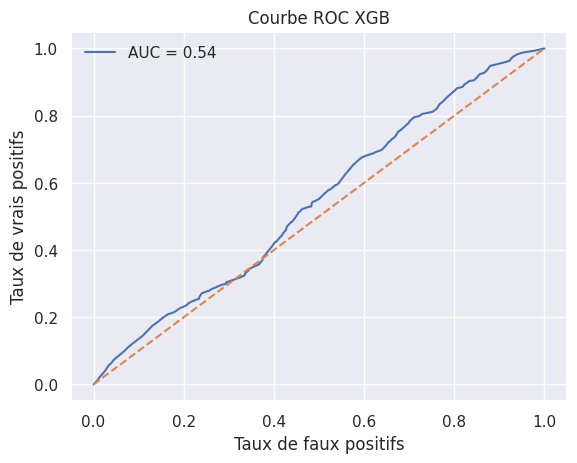

In [ ]:
# COURBES ROC ET AUC grid_xgb_best
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

probs = grid_xgb_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC XGB best')
plt.legend()
plt.show()

In [ ]:
sample_size = int(0.05 * len(X_train))  # 20% de la taille de X_train

# Échantillon aléatoire
random_sample = X_train.sample(n=sample_size, random_state=42)

# Initialisez l'explainer SHAP pour le modèle
explainer = shap.TreeExplainer(xgb)

# Calculez les valeurs SHAP
shap_values = explainer.shap_values(random_sample)

# Affiche les graphiques SHAP
shap.summary_plot(shap_values, random_sample, feature_names=X_train.columns)
X_train.shape

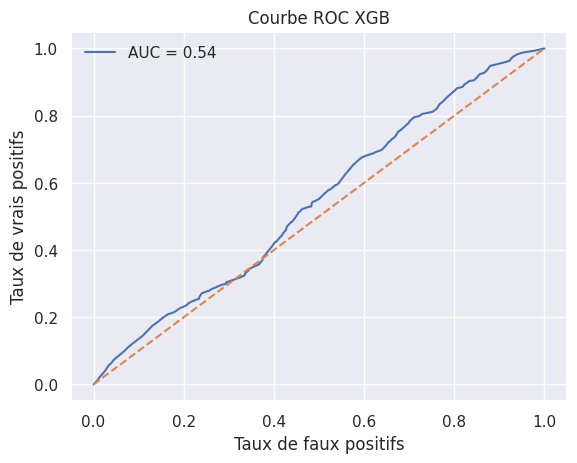

In [ ]:
# COURBES ROC ET AUC grid_xgb
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

probs = grid_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC XGB')
plt.legend()
plt.show()

## XGB

In [ ]:
#Nouveaux score et matrice de confusion en ne gardant que ces deux variables : les prédictions ne perdent pas en qualité
#df_ml_feats4 = df_ml_feats[['sub_category_food', 'sub_category_crafts', 'sub_category_comics', 'sub_category_technology', 'sub_category_journalism','sub_category_photography', 'duration']]

#création jeu de test avec 20% de donnees test et random_state = 42
X_train, X_test, y_train, y_test = train_test_split(df_ml_feats, df_ml_target, test_size = 0.2, random_state = 42)

# Standardisation des données : mise à l'echelle des colonnes de X_train et X_test
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#encodage de la cible
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

xgb = XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 300)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
cm = pd.crosstab(y_test, y_pred_xgb, rownames = ["valeurs reelles"], colnames = ["valeurs predites"])
cm

valeurs predites,0,1
valeurs reelles,,
0,7705,7365
1,3609,18175


In [ ]:
# Afficher le rapport de classification
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.64      0.45      0.53     15070
           1       0.69      0.83      0.75     21784

    accuracy                           0.67     36854
   macro avg       0.66      0.64      0.64     36854
weighted avg       0.67      0.67      0.66     36854



In [ ]:
# Calculer le taux de bonnes prédictions du modèle.
print("le score est de " , xgb.score(X_test_scaled, y_test))

le score est de  0.6727899278233027


In [ ]:
print('Score sur ensemble train', xgb.score(X_train_scaled, y_train))

print('Score sur ensemble test', xgb.score(X_test_scaled, y_test))

Score sur ensemble train 0.7140008004721429
Score sur ensemble test 0.7022304227492266


In [ ]:
# Instancier le modele de XGB
xgb = XGBClassifier()

# Standardisation des données : mise à l'echelle des colonnes de X_train et X_test
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Entraînement de l'algorithme sur l'ensemble d'entraînement (X_train et y_train)
xgb.fit(X_train_scaled, y_train)

# Prédire les données de l'ensemble de test et stocker les dans la variable y_pred.
y_pred = xgb.predict(X_test_scaled)

# Afficher la matrice de confusion cm pour verifier le ML
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

NameError: ignored

In [ ]:
# Entrainer le modele avec les meilleurs hyperparametres
#xgb = XGBClassifier()
#xgb.fit(X_train_scaled, y_train)
#y_pred_xgb = xgb.predict(X_test_scaled)
##cm = pd.crosstab(y_test, y_pred_xgb, rownames = ["valeurs reelles"], colnames = ["valeurs predites"])
#cm

In [ ]:
# Standardisation des données : mise à l'echelle des colonnes de X_train et X_test
#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Définir les paramètres
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Créer le modèle XGBoost
xgb = xgb.XGBClassifier()

# Créer l'objet GridSearchCV
grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3)

# Ajuster le modèle avec GridSearchCV
grid_xgb.fit(X_train_scaled, y_train)

# Accéder aux meilleurs hyperparamètres et au meilleur score
best_params = grid_xgb.best_params_
best_score = grid_xgb.best_score_

print("Meilleurs hyperparamètres : ", best_params)
print("Meilleur score : ", best_score)








Meilleurs hyperparamètres :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Meilleur score :  0.7036489369931478


In [ ]:
# JOBLIB GRID SEARCH GRID_RFC
import joblib
# Sauvegarder les résultats de GridSearch avec joblib
joblib.dump(grid_xgb, 'grid_xgb.joblib')

['grid_xgb.joblib']

In [ ]:
from google.colab import files

# Télécharger le modèle sauvegardé
files.download('grid_xgb.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# JOBLIB
import joblib
joblib.dump(xgb, 'xgb.joblib')

from google.colab import files
files.download('xgb.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Entrainer le modele avec les meilleurs hyperparametres
xgb = XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 300)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
cm = pd.crosstab(y_test, y_pred_xgb, rownames = ["valeurs reelles"], colnames = ["valeurs predites"])
cm

valeurs predites,0,1
valeurs reelles,,
0,7705,7365
1,3609,18175


In [ ]:
# JOBLIB
joblib.dump(y_pred_xgb, 'y_pred_xgb.joblib')
files.download('y_pred_xgb.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Calculer le taux de bonnes prédictions du modèle.
print("le score est de " , xgb.score(X_test_scaled, y_test))

In [ ]:
# Afficher le rapport de classification
print(classification_report(y_test, y_pred_xgb))

In [ ]:
# Score avec le adaboost
from sklearn.ensemble import AdaBoostClassifier

# Création du classifier et construction du modèle sur les données d'entraînement
ac = AdaBoostClassifier(base_estimator= xgb, n_estimators=30)
ac.fit(X_train_scaled, y_train)

In [ ]:
# Calcul de l'accuracy
score_ac = ac.score(X_test_scaled, y_test)

In [ ]:
print(score_ac)

In [ ]:
# SHAP VALUES
!pip install shap
#!pip install --upgrade pip

In [ ]:
import shap

sample_size = int(0.10 * len(X_train))  # 10% de la taille de X_train

# Échantillon aléatoire
random_sample = X_train.sample(n=sample_size, random_state=42)

# Initialisez l'explainer SHAP pour le modèle
explainer = shap.TreeExplainer(xgb)

# Calculez les valeurs SHAP
shap_values = explainer.shap_values(random_sample)

# Affiche les graphiques SHAP
shap.summary_plot(shap_values, random_sample, feature_names=X_train.columns)
X_train.shape

In [ ]:
data_ml.head()

In [ ]:
#séparation du jeu de données en variables explicatives et variable cible
data_ml_feats = data_ml
data_ml_target = data_ml['status']


In [ ]:
#création jeu de test avec 20% de donnees test et random_state = 42
X_train, X_test, y_train, y_test = train_test_split(data_ml_feats, data_ml_target, test_size = 0.2, random_state = 42)

In [ ]:
X_train

In [ ]:
import shap

sample_size = int(0.10 * len(X_train))  # 10% de la taille de X_train

# Échantillon aléatoire
random_sample = X_train.sample(n=sample_size, random_state=42)

# Initialisez l'explainer SHAP pour le modèle
explainer = shap.TreeExplainer(xgb)

# Calculez les valeurs SHAP
shap_values = explainer.shap_values(random_sample)

# Affiche les graphiques SHAP
shap.summary_plot(shap_values, random_sample, feature_names=X_train.columns)
X_train.shape

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Chargez votre modèle
model = load_model()

# Préparez les données d’entrée que vous souhaitez expliquer
X = prepare_data()

# Créez un objet SHAP en utilisant l’explicatif TreeExplainer
explainer = shap.TreeExplainer(model)

# Appelez la méthode explain en lui passant les données d’entrée
shap_values = explainer.explain(X)

# Affichez un graphique résumé de l’importance relative de chaque caractéristique
shap.summary_plot(shap_values, X)

# Affichez le diagramme de dépendance de la caractéristique « age »
shap.dependence_plot(« age », shap_values, X)